# Load Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
import seaborn as sns

# Read Data

In [21]:
# Đọc file từng dòng một
lines = []
with open(r"encoded-Sample - Superstore - Modified -.csv", 'r', encoding='utf-8', errors='replace') as file:
    for line in file:
        lines.append(line)

# Ghi các dòng đã xử lý vào một tệp tạm thời
with open('SuperStore_CohortAnalysis.csv', 'w', encoding='utf-8') as temp_file:
    temp_file.writelines(lines)

# Tải DataFrame từ tệp tạm thời
df = pd.read_csv('SuperStore_CohortAnalysis.csv')
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels For Typewriters B...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford Cr4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   object        
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  SubCategory   9994 non-null   object  

In [22]:
#Convert OrderDate to Date Type
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
#Add to column 'Year'
df['Year'] = df['OrderDate'].dt.year

In [25]:
#Chọn 2016 để thực hiện Cohort KH cho bài
year_select = 2016
#Lọc dữ liệu đã chọn năm 2016
df = df.loc[df['Year'] == year_select]

In [28]:
#Kiểm tra dữ liệu Null trong 4 cột cần phần tích
df[['OrderID', 'OrderDate', 'CustomerID', 'Sales']].isnull().sum()

OrderID       0
OrderDate     0
CustomerID    0
Sales         0
dtype: int64

In [36]:
#Lấy 4 cột này để cần phân tích bài toán Cohort 
customer_df = df[['OrderID', 'OrderDate', 'CustomerID', 'Sales']]
customer_df

,OrderID,OrderDate,CustomerID,Sales
0,CA-2016-152156,2016-11-08,CG-12520,261.96
1,CA-2016-152156,2016-11-08,CG-12520,731.94
2,CA-2016-138688,2016-06-12,DV-13045,14.62
13,CA-2016-161389,2016-12-05,IM-15070,407.98
21,CA-2016-137330,2016-12-09,KB-16585,19.46
...,...,...,...,...
9978,US-2016-103674,2016-12-06,AP-10720,13.38
9979,US-2016-103674,2016-12-06,AP-10720,437.47
9982,US-2016-157728,2016-09-22,RC-19960,35.56
9983,US-2016-157728,2016-09-22,RC-19960,97.98


In [37]:
#Kiểm tra trường thông tin của 4 cột cần phân tích Cohort
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 9986
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     2587 non-null   object        
 1   OrderDate   2587 non-null   datetime64[ns]
 2   CustomerID  2587 non-null   object        
 3   Sales       2587 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 101.1+ KB


In [38]:
customer_df['CustomerID'].nunique()

638

In [39]:
#Xem phân tích mô tả của CustomerID
customer_df['CustomerID'].value_counts()

JD-15895    21
EH-13765    21
PP-18955    20
PK-19075    17
WB-21850    16
            ..
LD-16855     1
CA-11965     1
KA-16525     1
AG-10495     1
ML-17410     1
Name: CustomerID, Length: 638, dtype: int64

In [41]:
#Tính OrtherMonth
def getMonthYearOrder(x):
    return dt.datetime(x.year, x.month, 1)
customer_df['OrderMonth'] = customer_df['OrderDate'].apply(getMonthYearOrder)

In [43]:
#Tính CohortMonth là giá trị mà KH mua hàng lần đầu tiên của OrderDate
customer_df['CohortMonth'] = customer_df.groupby('CustomerID')['OrderMonth'].transform('min')

In [46]:
#Tính CohortIndex = OrderMonth - CohortMonth để tính những tháng mua hàng tiếp theo của KH
def getMonth(column):
    return customer_df[column].dt.month
#Tiến hành lấy giá trị tháng của 2 cột OrderMonth, CohortMonth
OrderMonth = getMonth('OrderMonth')
CohortMonth = getMonth('CohortMonth')

In [47]:
#Tính CohortIndex = OrderMonth - CohortMonth
Month_Diff = OrderMonth - CohortMonth
Month_Diff

0        0
1        0
2        0
13       6
21      11
        ..
9978     7
9979     7
9982     0
9983     0
9986     0
Length: 2587, dtype: int64

In [48]:
#Tiến hành tạo cột CohortIndex
customer_df['CohortIndex'] = Month_Diff + 1

# Sau khi đã chuẩn bị những bước trên, tiếp theo sẽ tiến hành vào bài toán 

In [91]:
#Tính Cohort của mỗi KH cụ thể, để xem có bao nhiêu KH Retention 
cohort_df = customer_df.groupby(['CohortMonth', 'OrderMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [92]:
#Tạo hàm để chuyển kiểu dữ liệu datetime về date
def convert_datetostr(df, col):
    return df[col].dt.strftime('%Y-%m-%d')

In [93]:
#Gán vào 2 cột OrderMonth, CohortMonth
cohort_df['OrderMonth'] = convert_datetostr(cohort_df, 'OrderMonth')
cohort_df['CohortMonth'] = convert_datetostr(cohort_df, 'CohortMonth')

In [55]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CohortMonth  78 non-null     object
 1   OrderMonth   78 non-null     object
 2   CohortIndex  78 non-null     int64 
 3   CustomerID   78 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB


In [56]:
#Tính Cohort_Table bằng phương thức hiển thị Pivot
Cohort_Table = cohort_df.pivot(index = 'CohortMonth',
                               columns = 'CohortIndex',
                               values = 'CustomerID')

In [61]:
Cohort_Table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2016-01-01,46.0,1.0,2.0,4.0,5.0,5.0,6.0,4.0,8.0,6.0,12.0,12.0
2016-02-01,41.0,3.0,3.0,2.0,6.0,4.0,2.0,7.0,7.0,5.0,7.0,NaN
2016-03-01,75.0,8.0,11.0,12.0,11.0,6.0,19.0,9.0,14.0,18.0,NaN,NaN
2016-04-01,68.0,10.0,7.0,10.0,9.0,21.0,8.0,11.0,16.0,NaN,NaN,NaN
2016-05-01,68.0,6.0,10.0,5.0,19.0,10.0,19.0,11.0,NaN,NaN,NaN,NaN
2016-06-01,54.0,4.0,4.0,15.0,7.0,13.0,13.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,44.0,6.0,13.0,3.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,50.0,9.0,4.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,65.0,3.0,15.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


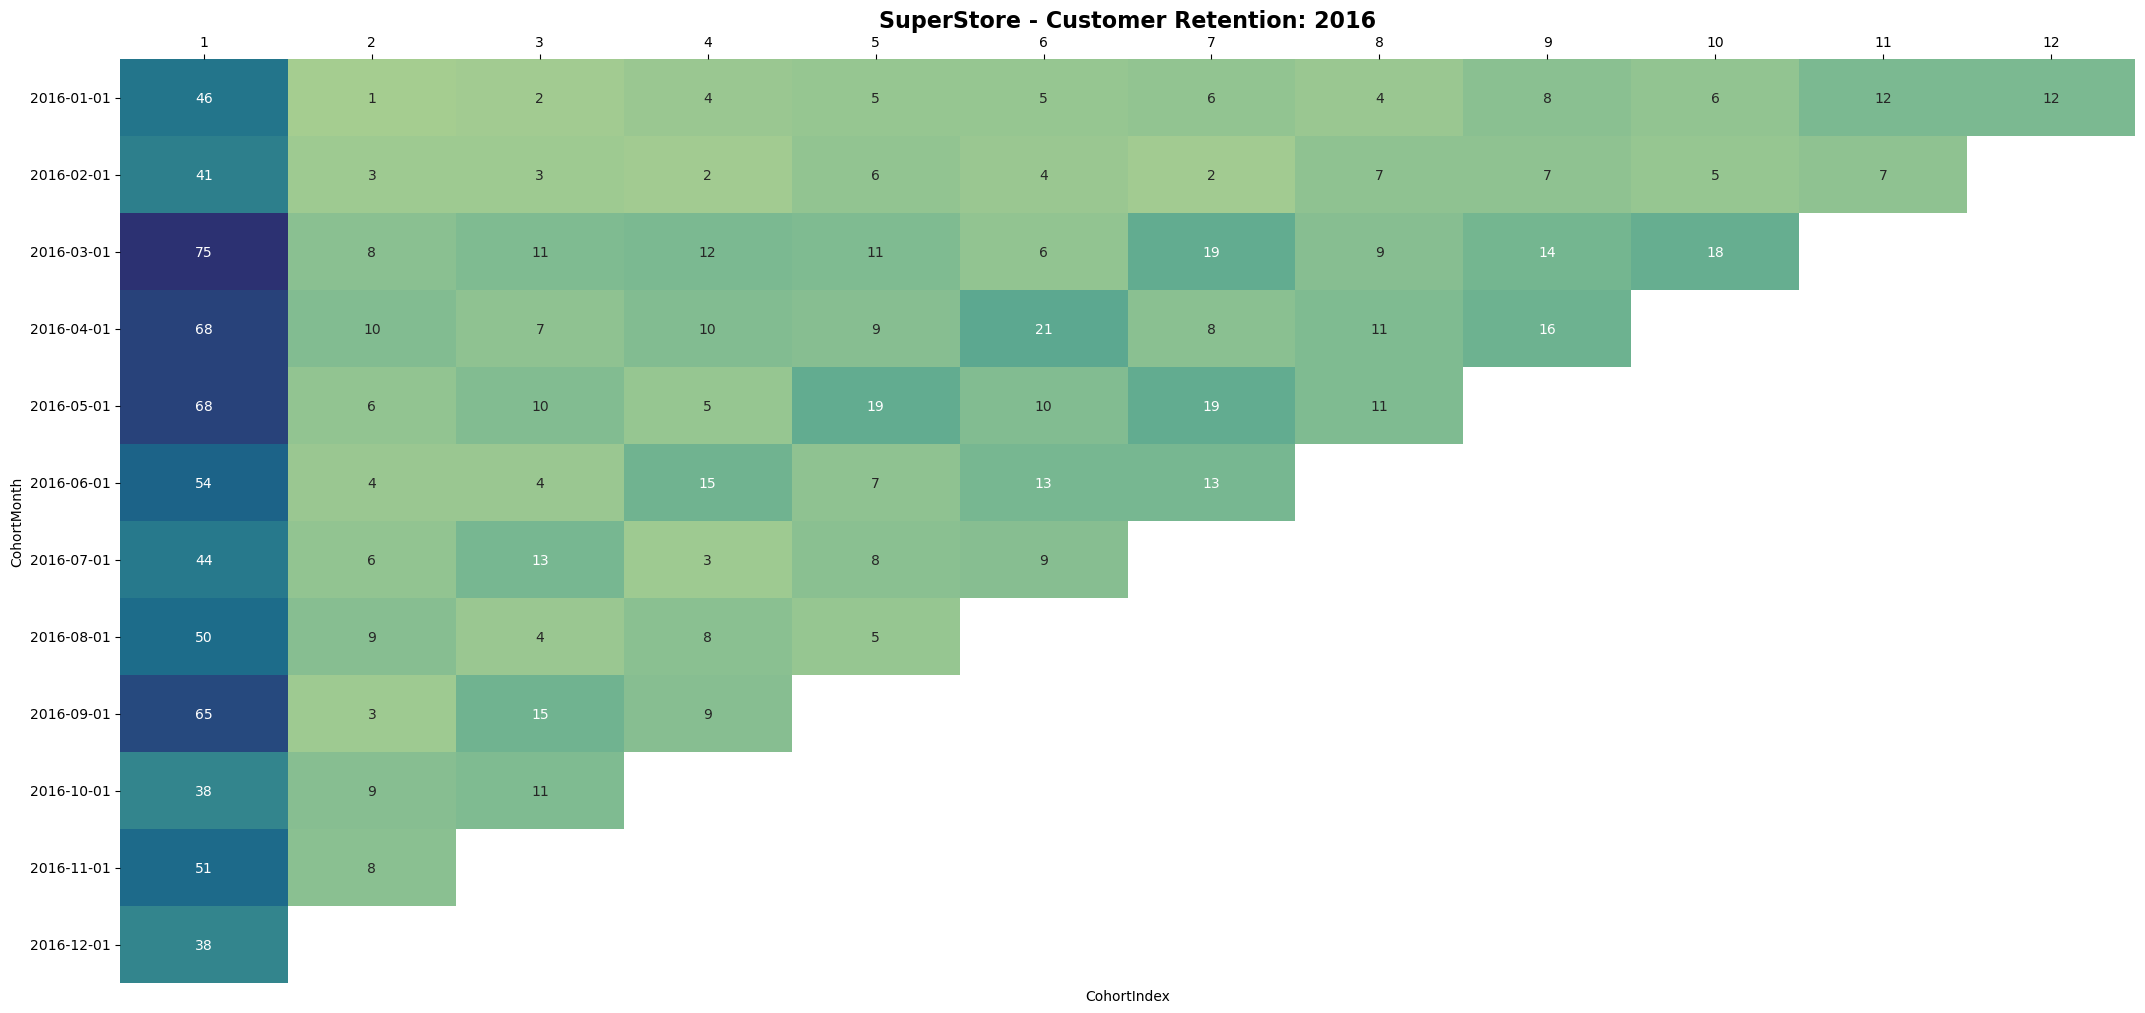

In [67]:
#Visualize bằng Heatmap
def plot_heatmap(data, annot, color, format_values):
    plt.figure(figsize=(26,12))
    plt.title('SuperStore - Customer Retention: {}'.format(year_select),
              fontsize=16,
              fontweight='bold')
    ax = sns.heatmap(data,
                     annot=annot,
                     cmap=color,
                     cbar=False,
                     fmt=format_values)
    ax.xaxis.tick_top()
#Plot Heatmap
plot_heatmap(Cohort_Table, True, 'crest', '.0f')

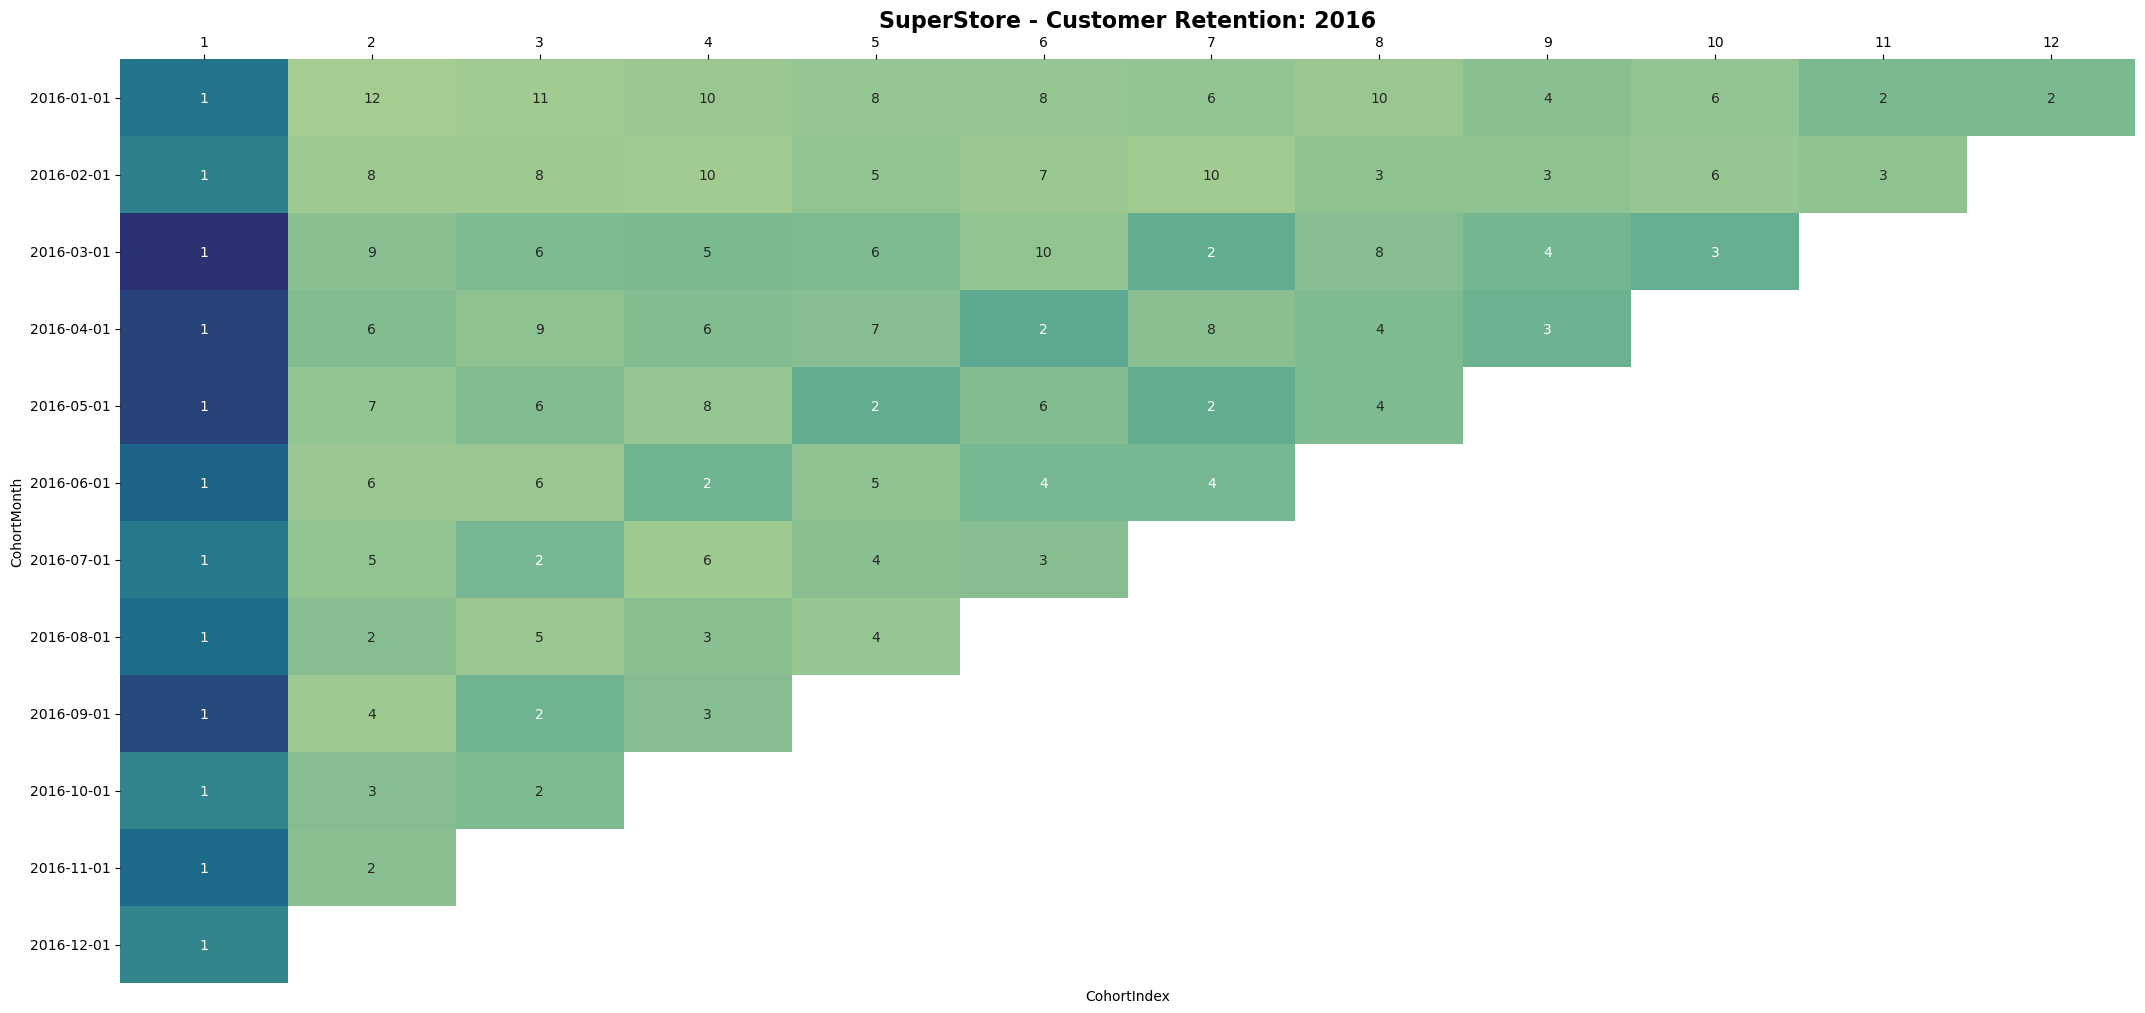

In [68]:
#Phân hạng cho những KH đặt hàng cao nhất xếp hạng từ lớn đến bé theo thứ tự giảm dần.
plot_heatmap(Cohort_Table, Cohort_Table.rank(axis='columns', ascending=False), 'crest', '.0f')

In [70]:
#Biểu diễn Retention Rates theo tỷ lệ phần trăm
revenue_df = customer_df.groupby(['CohortMonth',
                                  'CohortIndex'])['Sales'].sum().round(2).reset_index()
revenue_df

,CohortMonth,CohortIndex,Sales
0,2016-01-01,1,18542.52
1,2016-01-01,2,623.96
2,2016-01-01,3,1455.34
3,2016-01-01,4,1536.07
4,2016-01-01,5,4304.27
...,...,...,...
73,2016-10-01,2,4142.16
74,2016-10-01,3,6303.81
75,2016-11-01,1,20048.48
76,2016-11-01,2,4421.59


In [71]:
#Tương tự chuyển CohortMonth trong Revenue_df về dạng Date không lấy Time
revenue_df['CohortMonth'] = convert_datetostr(revenue_df, 'CohortMonth')

In [72]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CohortMonth  78 non-null     object 
 1   CohortIndex  78 non-null     int64  
 2   Sales        78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [73]:
#Tiến hành PivotTable cho bảng Revenue
revenue_table = revenue_df.pivot(index='CohortMonth',
                                 columns = 'CohortIndex',
                                 values='Sales')
revenue_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2016-01-01,18542.52,623.96,1455.34,1536.07,4304.27,1772.57,2446.81,321.62,6962.28,3291.97,2313.68,8058.31
2016-02-01,22354.86,710.83,114.86,309.28,924.16,1700.01,71.60,4659.64,2300.54,5950.48,13324.93,NaN
2016-03-01,49549.69,3580.70,8517.28,8247.76,2535.51,2379.54,10816.82,2396.21,5859.14,7744.92,NaN,NaN
2016-04-01,33518.41,3161.98,5295.13,2752.36,2680.31,7291.40,2471.14,6229.82,12324.72,NaN,NaN,NaN
2016-05-01,40694.94,2117.37,9499.25,3635.80,6821.46,6939.67,6784.09,5036.86,NaN,NaN,NaN,NaN
2016-06-01,21987.55,3456.60,4305.19,3087.56,919.19,5507.15,6418.50,NaN,NaN,NaN,NaN,NaN
2016-07-01,16871.45,2812.55,4181.30,372.25,5894.89,8373.14,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,14908.74,1574.84,2410.36,4443.48,3587.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,28014.79,994.26,12238.66,3253.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


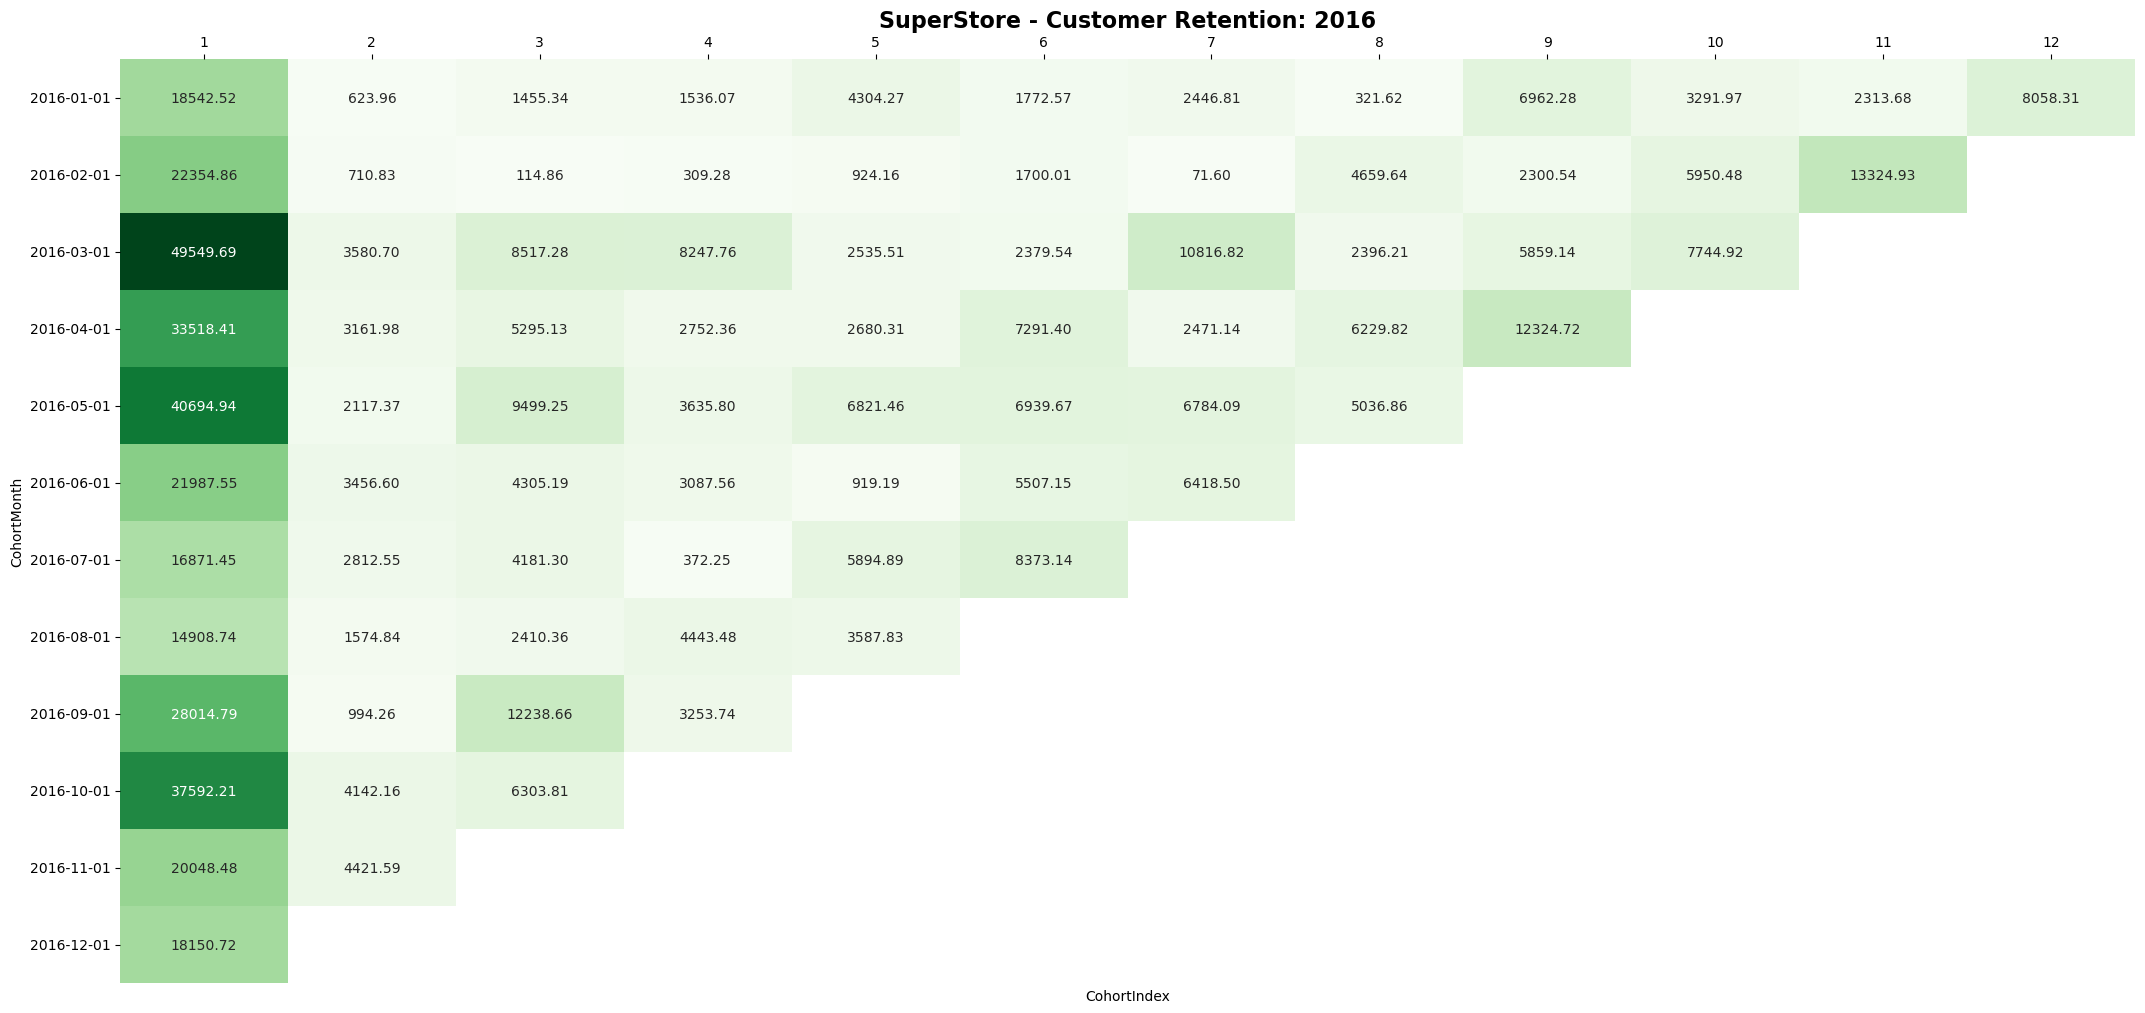

In [77]:
plot_heatmap(revenue_table, True, 'Greens', '.2f')

# Biểu diễn Plot theo phần trăm KH 

In [79]:
# Bước 1: Đếm số lượng khách hàng duy nhất cho mỗi nhóm cohort và chỉ số cohort
customer_counts = customer_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
customer_counts.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)

# Bước 2: Tính tổng số khách hàng cho mỗi cohort
total_customers = customer_df.groupby('CohortMonth')['CustomerID'].nunique().reset_index()
total_customers.rename(columns={'CustomerID': 'TotalCustomers'}, inplace=True)

# Bước 3: Kết hợp tổng số khách hàng với số lượng khách hàng theo cohort
percentage_df = pd.merge(customer_counts, total_customers, on='CohortMonth')

# Bước 4: Tính tỷ lệ phần trăm khách hàng
percentage_df['CustomerPercentage'] = (percentage_df['CustomerCount'] / percentage_df['TotalCustomers']) * 100

# Tùy chọn, làm tròn giá trị phần trăm
percentage_df['CustomerPercentage'] = percentage_df['CustomerPercentage'].round(2)

# Hiển thị DataFrame tỷ lệ phần trăm
percentage_df

,CohortMonth,CohortIndex,CustomerCount,TotalCustomers,CustomerPercentage
0,2016-01-01,1,46,46,100.00
1,2016-01-01,2,1,46,2.17
2,2016-01-01,3,2,46,4.35
3,2016-01-01,4,4,46,8.70
4,2016-01-01,5,5,46,10.87
...,...,...,...,...,...
73,2016-10-01,2,9,38,23.68
74,2016-10-01,3,11,38,28.95
75,2016-11-01,1,51,51,100.00
76,2016-11-01,2,8,51,15.69


In [94]:
#Tương tự bước trên tiến hành chuyển CohortMonth từ Datetime về Date
percentage_df['CohortMonth'] = convert_datetostr(percentage_df, 'CohortMonth')

In [95]:
#Tiến hành PivotTable cho bảng Revenue
percentage_table = percentage_df.pivot(index='CohortMonth',
                                 columns = 'CohortIndex',
                                 values='CustomerPercentage')
percentage_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2016-01-01,100.0,2.17,4.35,8.70,10.87,10.87,13.04,8.70,17.39,13.04,26.09,26.09
2016-02-01,100.0,7.32,7.32,4.88,14.63,9.76,4.88,17.07,17.07,12.20,17.07,NaN
2016-03-01,100.0,10.67,14.67,16.00,14.67,8.00,25.33,12.00,18.67,24.00,NaN,NaN
2016-04-01,100.0,14.71,10.29,14.71,13.24,30.88,11.76,16.18,23.53,NaN,NaN,NaN
2016-05-01,100.0,8.82,14.71,7.35,27.94,14.71,27.94,16.18,NaN,NaN,NaN,NaN
2016-06-01,100.0,7.41,7.41,27.78,12.96,24.07,24.07,NaN,NaN,NaN,NaN,NaN
2016-07-01,100.0,13.64,29.55,6.82,18.18,20.45,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,100.0,18.00,8.00,16.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,100.0,4.62,23.08,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


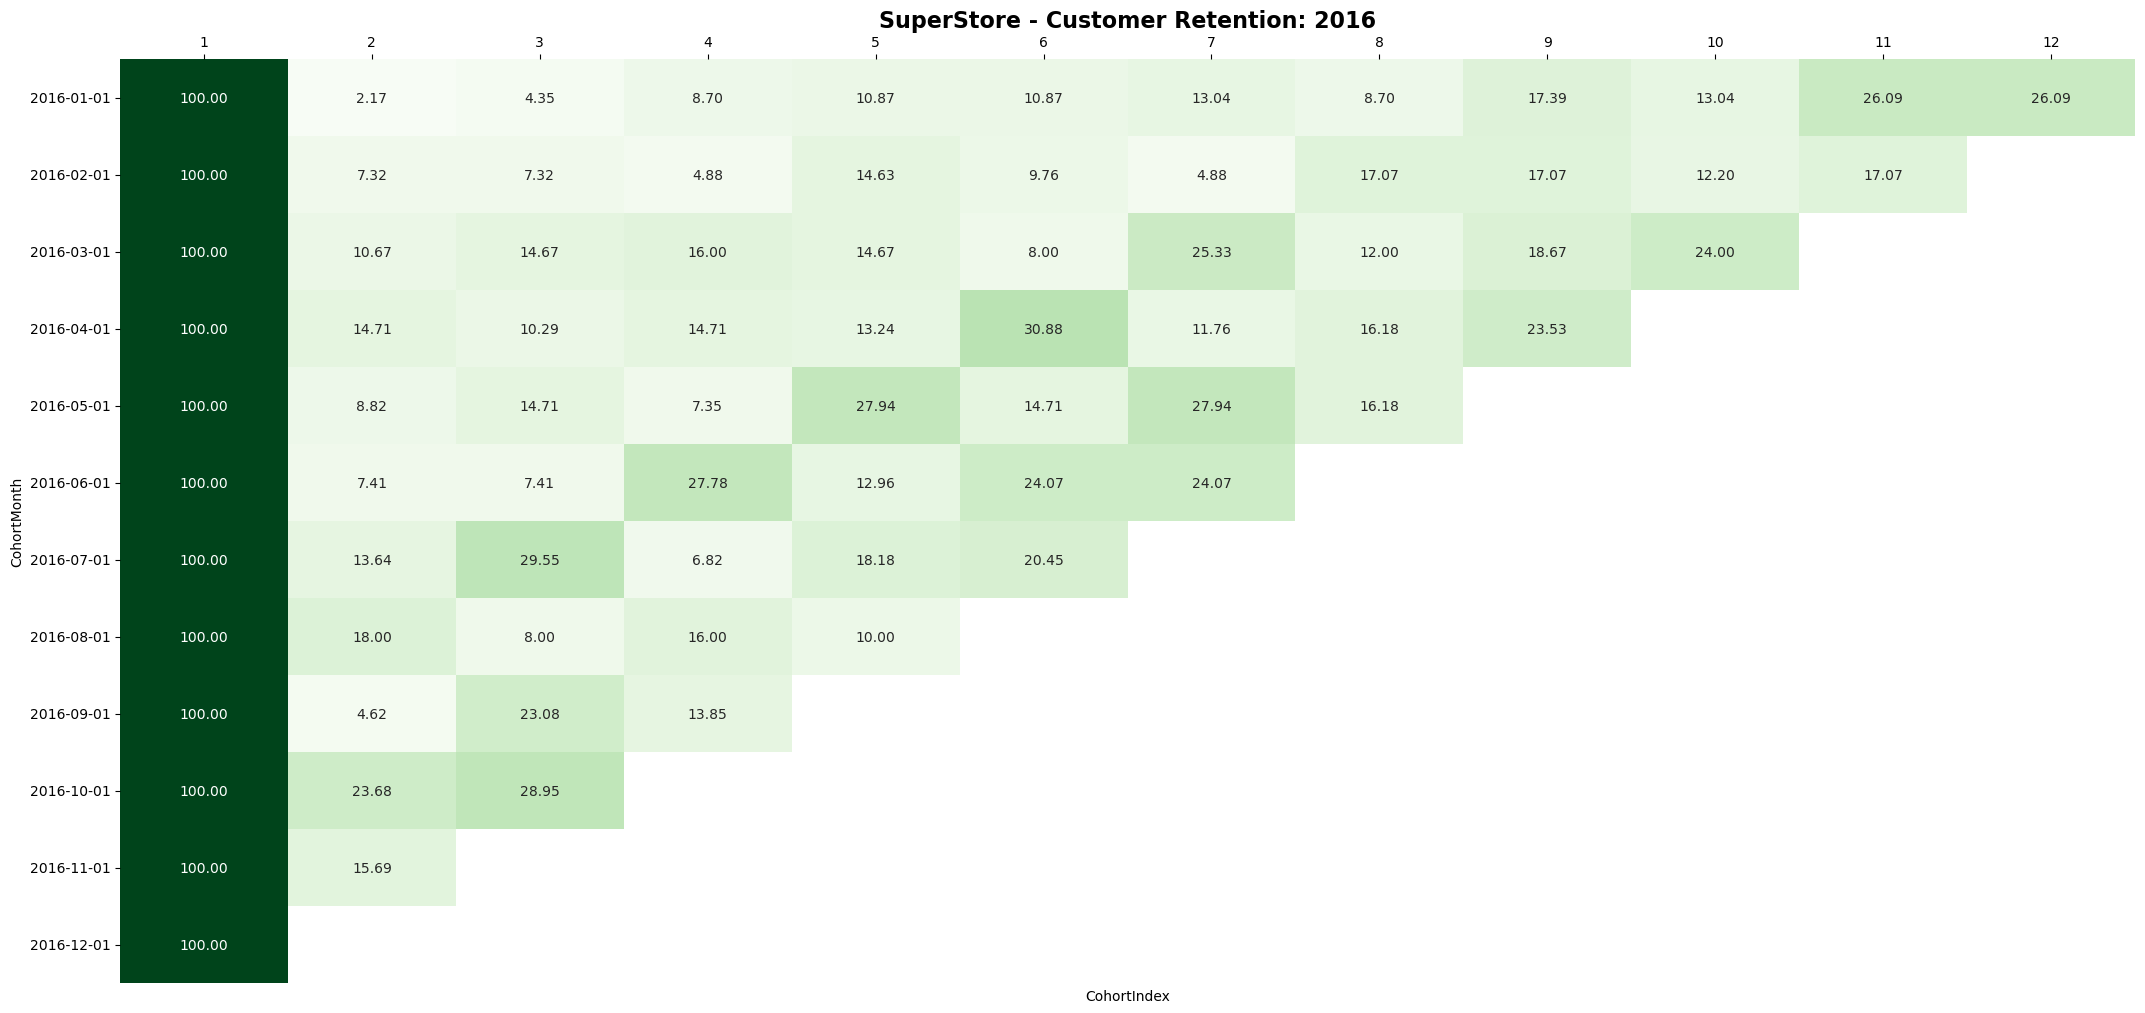

In [97]:
plot_heatmap(percentage_table, True, 'Greens', '.2f')